First let's crop images from the ghibili dataset ...

First Dataset: https://www.kaggle.com/datasets/shubham1921/real-to-ghibli-image-dataset-5k-paired-images ...

In [9]:
import os
import cv2
import tqdm

In [ ]:
input_folder = './data/trainB_ghibli'
output_folder = './data/final_trainB'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')

nr_of_faces = 0
tqdm.tqdm.write("Starting face detection...")

# Iterate through all images in the input folder
for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24))
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face
            face = img[y:y+h, x:x+w]
            # Save the cropped face
            output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
            cv2.imwrite(output_path, face)
            nr_of_faces += 1
        
print(f"Total faces detected and saved: {nr_of_faces}")
print("Face detection and saving completed.")

Starting face detection...


Processing images: 100%|██████████| 2500/2500 [03:09<00:00, 13.19image/s]

Total faces detected and saved: 484
Face detection and saving completed.


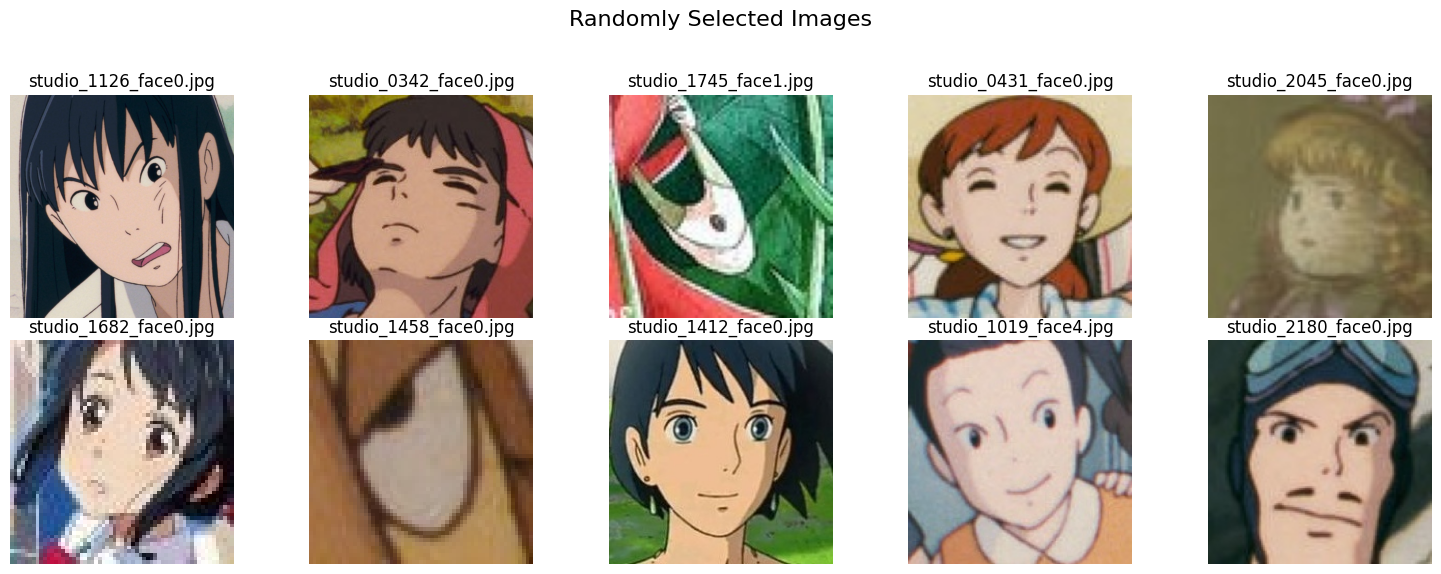

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def plot_random_images(folder_path, num_images=10):
    """
    Plots a specified number of random images from a given folder.

    Parameters:
        folder_path (str): Path to the folder containing the images.
        num_images (int): Number of random images to plot. Default is 10.
    """
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select images
    random_images = random.sample(image_files, num_images)

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Randomly Selected Images', fontsize=16)

    # Flatten the axes array for easy iteration
    axes = axes.ravel()

    # Loop through the selected images and display them
    for ax, img_file in zip(axes, random_images):
        # Read the image
        img_path = os.path.join(folder_path, img_file)
        img = mpimg.imread(img_path)

        # Display the image
        ax.imshow(img)
        ax.axis('off')  # Hide the axes
        ax.set_title(img_file)  # Set the title to the image file name

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
    plt.show()  # Show the plot

plot_random_images(output_folder, num_images=10)

second_dataset: https://github.com/awesomedevnotes/awesome-studio-ghibli-works-images?tab=readme-ov-file#spirited-away

Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.09image/s]


Total faces detected and saved: 42
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.39image/s]


Total faces detected and saved: 7
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.16image/s]


Total faces detected and saved: 7
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:13<00:00,  4.04image/s]


Total faces detected and saved: 20
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:11<00:00,  4.45image/s]


Total faces detected and saved: 17
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.39image/s]


Total faces detected and saved: 10
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:12<00:00,  4.19image/s]


Total faces detected and saved: 23
Face detection and saving completed.
Starting face detection...


Processing images: 100%|██████████| 53/53 [00:13<00:00,  4.04image/s]


Total faces detected and saved: 26
Face detection and saving completed.


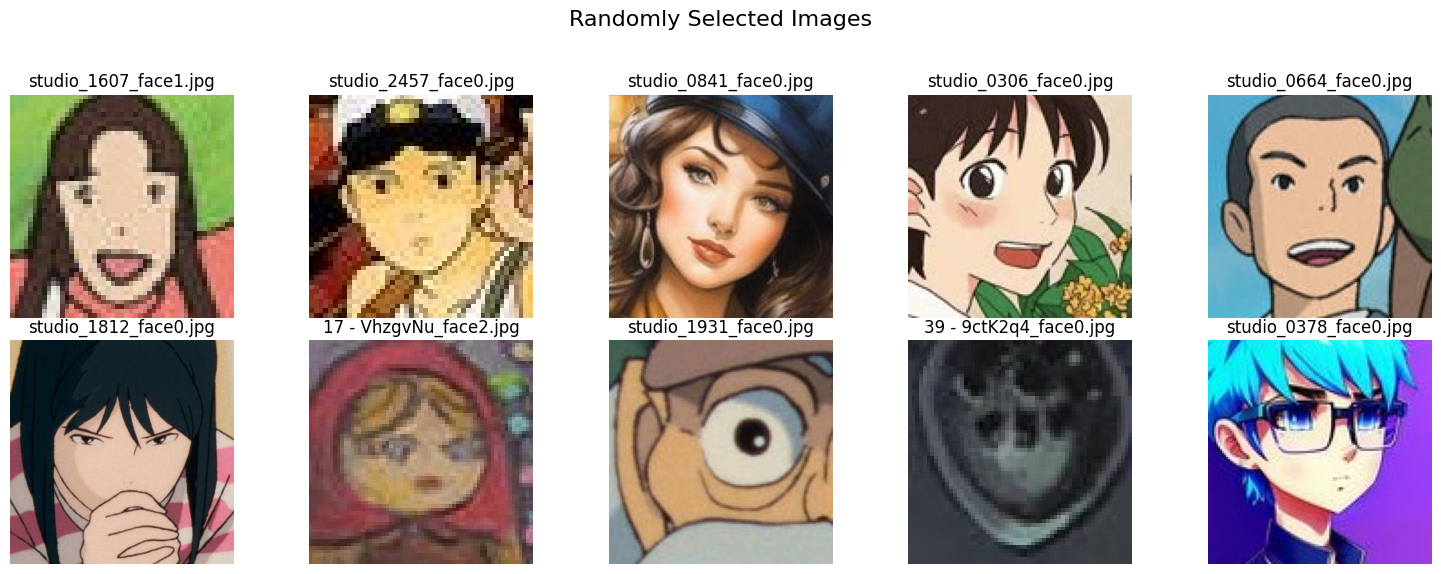

In [35]:
def detect_and_crop_faces(input_folder, output_folder, cascade_path, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24)):
    """
    Detects faces in images from the input folder, crops them, and saves them to the output folder.

    Parameters:
        input_folder (str): Path to the folder containing input images.
        output_folder (str): Path to the folder where cropped faces will be saved.
        cascade_path (str): Path to the Haar cascade XML file for face detection.
        scaleFactor (float): Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors (int): Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize (tuple): Minimum possible object size. Objects smaller than this are ignored.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    cascade = cv2.CascadeClassifier(cascade_path)

    nr_of_faces = 0
    tqdm.tqdm.write("Starting face detection...")

    # Iterate through all images in the input folder
    for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
            for i, (x, y, w, h) in enumerate(faces):
                # Crop the face
                face = img[y:y+h, x:x+w]
                # Save the cropped face
                output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
                cv2.imwrite(output_path, face)
                nr_of_faces += 1

    print(f"Total faces detected and saved: {nr_of_faces}")
    print("Face detection and saving completed.")

list_folders = ["From_Up_on_Poppy_Hill", "Tales_from_Earthsea", "tales_tales", "The_Tale_of_Princess_Kaguya", "The_Wind_Rises", "When_Marnie_Was_There", "Spirited_Away", "Arrietty", ]
for folder in list_folders:
    detect_and_crop_faces(f"./data/{folder}/", f"./data/final_trainB/", 'lbpcascade_animeface.xml', scaleFactor=1.05, minNeighbors=5, minSize=(12, 12))
plot_random_images(f"./data/final_trainB/", num_images=10)

third dataset: https://www.kaggle.com/datasets/amulbel/ghibli-movies-pictures

In [28]:
detect_and_crop_faces(
    input_folder='./data/Ghibli_movie_dataset',
    output_folder='./data/final_trainB',
    cascade_path='lbpcascade_animeface.xml',
    scaleFactor=1.05,
    minNeighbors=5,
    minSize=(24, 24)
)

Starting face detection...


Processing images: 100%|██████████| 943/943 [00:11<00:00, 79.34image/s]

Total faces detected and saved: 460
Face detection and saving completed.


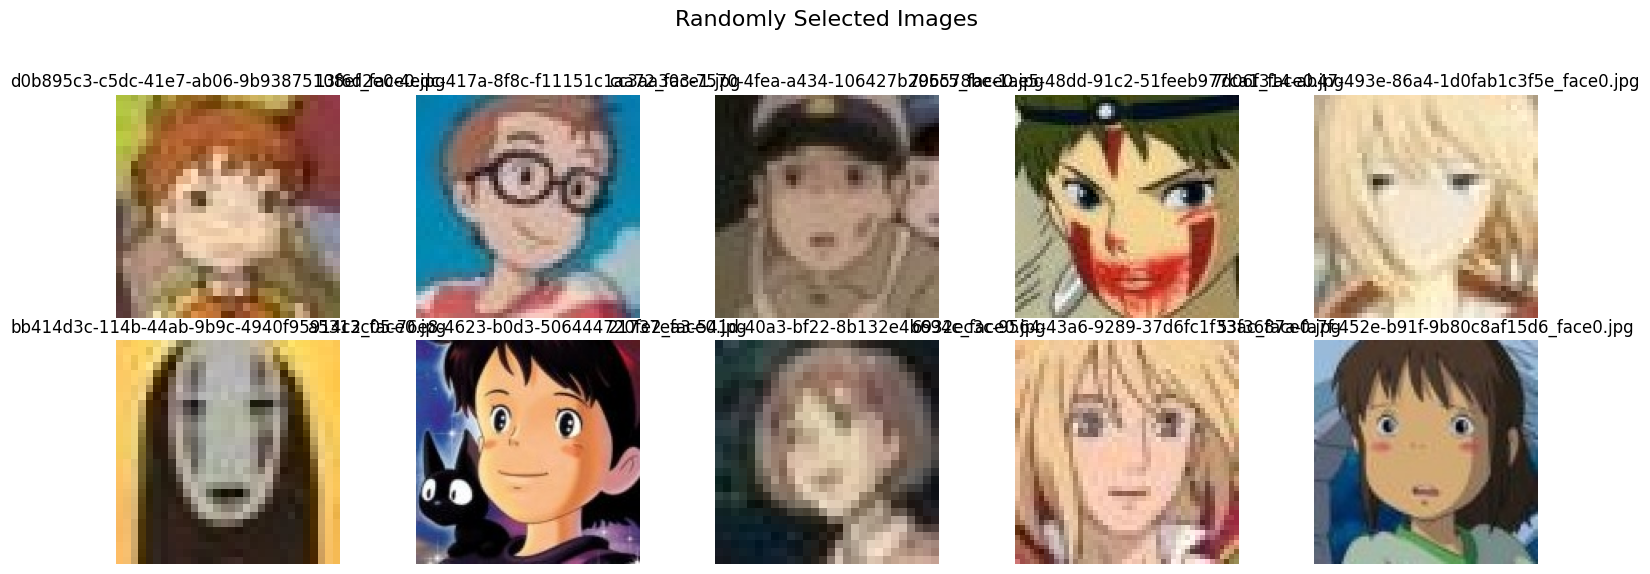

In [27]:
plot_random_images('./data/final_trainB_', num_images=10)

Now let's crop the real world faces of humans ...

First, from the first dataset ...

In [ ]:
# Adapted code to use a face detector
input_folder = './data/trainA'
output_folder = './data/final_trainA'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

nr_of_faces = 0
tqdm.tqdm.write("Starting face detection...")

# Iterate through all images in the input folder
for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24))
        for i, (x, y, w, h) in enumerate(faces):
            # Crop the face
            face = img[y:y+h, x:x+w]
            # Save the cropped face
            output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
            cv2.imwrite(output_path, face)
            nr_of_faces += 1

print(f"Total faces detected and saved: {nr_of_faces}")
print("Face detection and saving completed.")

Starting face detection...


Processing images: 100%|██████████| 2500/2500 [03:34<00:00, 11.66image/s]

Total faces detected and saved: 1136
Face detection and saving completed.


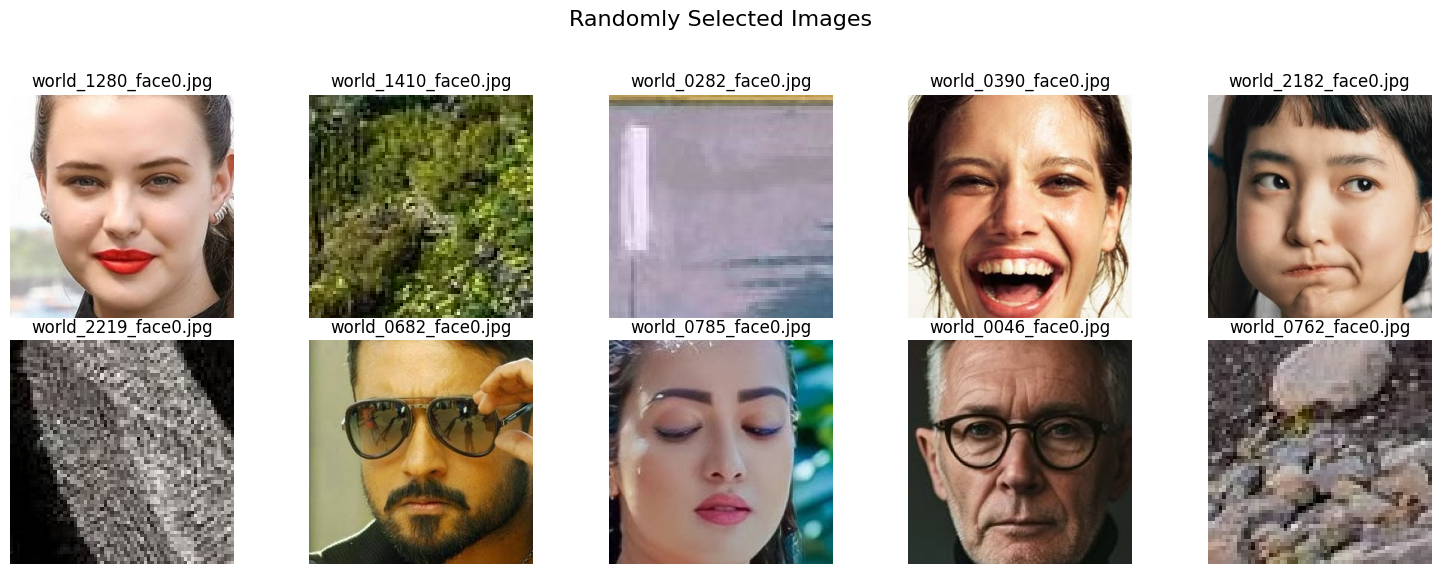

In [22]:
plot_random_images(output_folder, num_images=10)

... a lot of outliers ...


New dataset: https://www.kaggle.com/datasets/ashwingupta3012/human-faces

Starting face detection...


Processing images: 100%|██████████| 7219/7219 [18:19<00:00,  6.57image/s]  


Total faces detected and saved: 8081
Face detection and saving completed.


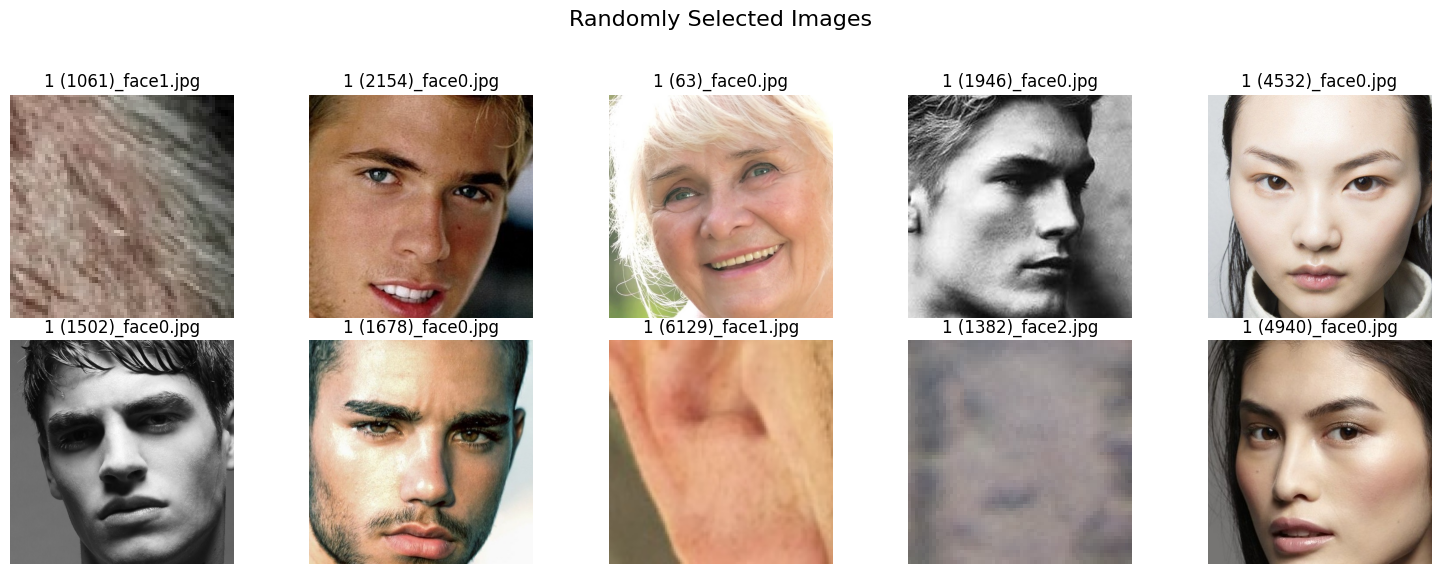

In [24]:
# lets define this useful function 
def detect_and_crop_faces(input_folder, output_folder, cascade_path, scaleFactor=1.1, minNeighbors=5, minSize=(24, 24)):
    """
    Detects faces in images from the input folder, crops them, and saves them to the output folder.

    Parameters:
        input_folder (str): Path to the folder containing input images.
        output_folder (str): Path to the folder where cropped faces will be saved.
        cascade_path (str): Path to the Haar cascade XML file for face detection.
        scaleFactor (float): Parameter specifying how much the image size is reduced at each image scale.
        minNeighbors (int): Parameter specifying how many neighbors each candidate rectangle should have to retain it.
        minSize (tuple): Minimum possible object size. Objects smaller than this are ignored.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    cascade = cv2.CascadeClassifier(cascade_path)

    nr_of_faces = 0
    tqdm.tqdm.write("Starting face detection...")

    # Iterate through all images in the input folder
    for filename in tqdm.tqdm(os.listdir(input_folder), desc="Processing images", unit="image"):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
            for i, (x, y, w, h) in enumerate(faces):
                # Crop the face
                face = img[y:y+h, x:x+w]
                # Save the cropped face
                output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_face{i}.jpg")
                cv2.imwrite(output_path, face)
                nr_of_faces += 1

    print(f"Total faces detected and saved: {nr_of_faces}")
    print("Face detection and saving completed.")

detect_and_crop_faces('./data/Humans', './data/final_trainB_2', cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
plot_random_images('./data/final_trainB_2', num_images=10)